In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import pgmpy
print(pgmpy.__version__)


1.0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
from sklearn.metrics import mean_squared_error, r2_score
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination

In [ ]:

# Load dataset
df = pd.read_csv("/content/fake_news_dataset.csv")


In [ ]:
df

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,25-04-2020,InfoWars,Technology,0.91,1227,...,38880,697,Right,Mixed,0,29,10,0.22,95.46,Fake
3996,3997,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,09-01-2022,CNN,Sports,-0.57,1296,...,3650,925,Left,FALSE,1,53,3,0.42,16.54,Fake
3997,3998,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,03-03-2023,Breitbart,Entertainment,-0.17,522,...,35391,577,Left,FALSE,0,22,9,0.50,28.51,Fake
3998,3999,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,13-04-2021,New York Times,Health,-0.88,169,...,40424,201,Left,FALSE,1,3,6,0.17,71.16,Real


In [ ]:

# EDA
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_

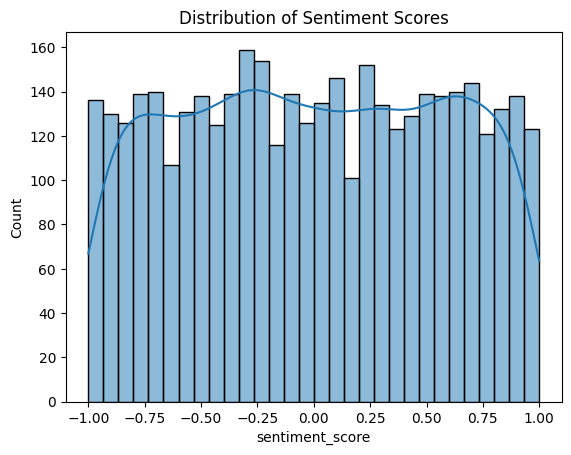

In [ ]:

# Data Visualization
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.show()


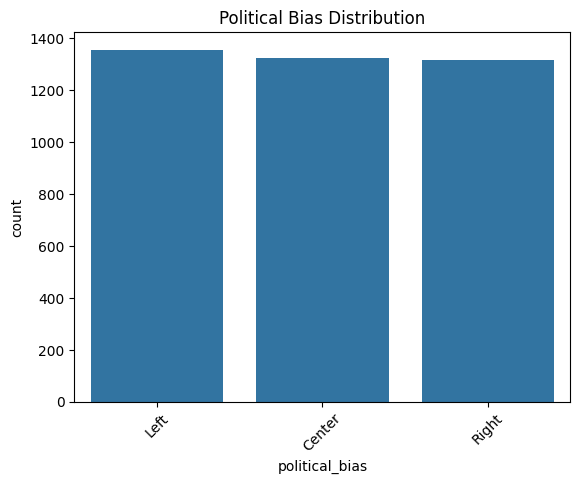

In [ ]:

sns.countplot(x='political_bias', data=df, order=df['political_bias'].value_counts().index)
plt.title("Political Bias Distribution")
plt.xticks(rotation=45)
plt.show()


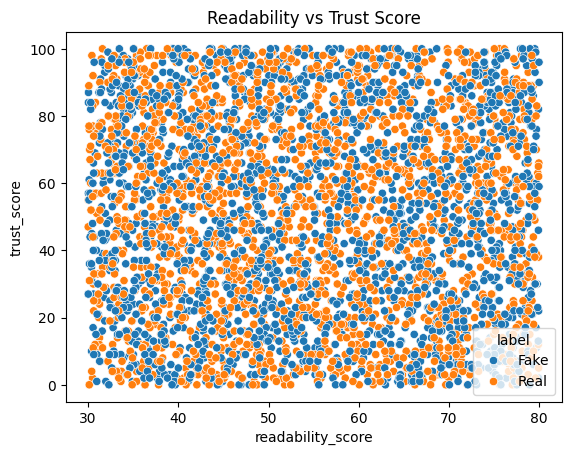

In [ ]:

sns.scatterplot(x=df['readability_score'], y=df['trust_score'], hue=df['label'])
plt.title("Readability vs Trust Score")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing
X = df[['sentiment_score', 'word_count', 'char_count', 'clickbait_score', 'plagiarism_score']]
y = (df['label'] == 'Fake').astype(int)  # Binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Gaussian Process Regression
print("\n--- Gaussian Process Regression ---")
kernels = [RBF(), Matern(), RBF() + WhiteKernel()]
for kernel in kernels:
    gp = GaussianProcessRegressor(kernel=kernel, random_state=42)
    gp.fit(X_train_scaled, y_train)
    y_pred = gp.predict(X_test_scaled)
    print(f"Kernel: {kernel}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R²: {r2_score(y_test, y_pred):.4f}\n")


--- Gaussian Process Regression ---


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: RBF(length_scale=1)
MSE: 0.5138
R²: -1.0566



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: Matern(length_scale=1, nu=1.5)
MSE: 0.5138
R²: -1.0566

Kernel: RBF(length_scale=1) + WhiteKernel(noise_level=1)
MSE: 0.2499
R²: -0.0002



In [ ]:
# Gaussian Process Classification
gpc = GaussianProcessClassifier(kernel=RBF(), random_state=42)
gpc.fit(X_train_scaled, y_train)
y_pred_class = gpc.predict(X_test_scaled)
print("--- Gaussian Process Classification ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


--- Gaussian Process Classification ---
Accuracy: 0.5138
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       389
           1       0.51      1.00      0.68       411

    accuracy                           0.51       800
   macro avg       0.26      0.50      0.34       800
weighted avg       0.26      0.51      0.35       800

Confusion Matrix:
 [[  0 389]
 [  0 411]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Discretizing word_count into bins
df['word_count_discrete'] = pd.cut(df['word_count'], bins=5, labels=[100, 200, 300, 400, 500])

# Update the Bayesian Network to use this discretized variable
model = DiscreteBayesianNetwork([('sentiment_score_discrete', 'label'), ('word_count_discrete', 'label'), ('char_count', 'label')])
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Inference on discretized values
infer = VariableElimination(model)
query = infer.query(variables=['label'], evidence={'sentiment_score_discrete': 0.5, 'word_count_discrete': 500})
print("Bayesian Network Inference Example:\n", query)


Bayesian Network Inference Example:
 +-------------+--------------+
| label       |   phi(label) |
+=============+==============+
| label(Fake) |       0.4999 |
+-------------+--------------+
| label(Real) |       0.5001 |
+-------------+--------------+
